<a href="https://colab.research.google.com/github/vartikatrao/PyTorch/blob/main/MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

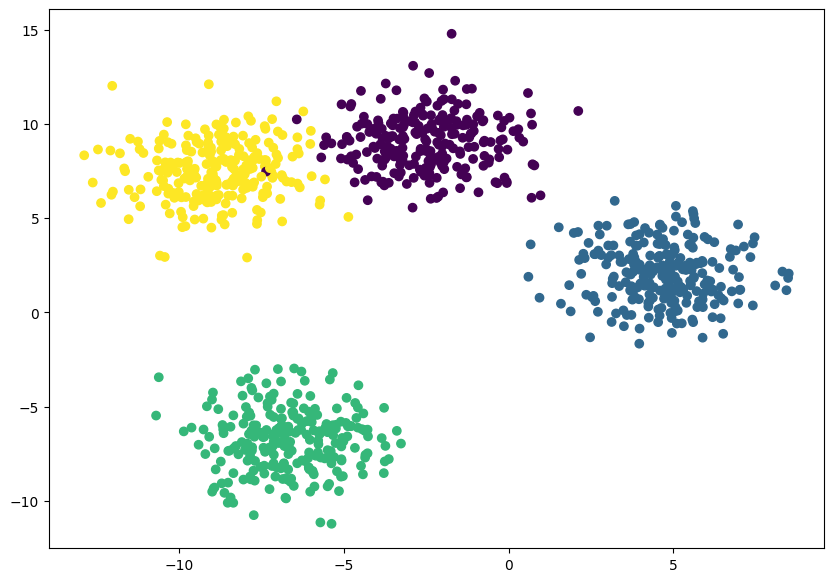

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES=4
NUM_FEATURES= 2
RANDOM_SEED= 42

# 1. create multiclass data
X_blob, y_blob= make_blobs(n_samples=1000, n_features= NUM_FEATURES, centers= NUM_CLASSES, cluster_std=1.5, random_state= RANDOM_SEED)

X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob= torch.from_numpy(y_blob).type (torch.LongTensor)

X_train, X_test, y_train, y_test= train_test_split(X_blob, y_blob, test_size= 0.2, random_state= RANDOM_SEED )

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob);

In [27]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [28]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
      super().__init__()
      self.linear_layer_stack= nn.Sequential(
          nn.Linear(in_features= input_features, out_features= hidden_units),
          nn.ReLU(),
          nn.Linear(in_features= hidden_units, out_features=hidden_units),
          nn.ReLU(),
          nn.Linear (in_features= hidden_units, out_features= output_features)
      )
  def forward (self, x):
    return self.linear_layer_stack(x)

model= BlobModel(input_features=2,
                 output_features=4, hidden_units=8).to(device)

model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [29]:
#Calculate accuracy
def accuracy_fn (y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))* 100
  return acc

In [30]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model.parameters(), lr= 0.1)

### TRAINING AND TESTING

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

for epoch in range (epochs):
  ### Training
  model.train()

  # predict
  y_logits= model(X_train)
  y_preds= torch.softmax(y_logits, dim=1).argmax(dim=1)

  # loss function
  loss = loss_fn (y_logits, y_train)
  acc= accuracy_fn (y_train, y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model.eval()

  test_logits= model(X_test)
  test_preds= torch.softmax(test_logits, dim=1).argmax(dim=1)

  test_loss= loss_fn (test_logits, y_test)
  test_acc= accuracy_fn (y_test, test_preds)
  if epoch%10==0:
      print(f"Epoch:{epoch}   |    Loss:  {loss:.5f},  Acc: { acc:.2f}%  |   Test loss {test_loss:.5f}  , Acc: {test_acc: .2f}%")


Epoch:0   |    Loss:  1.15883,  Acc: 40.38%  |   Test loss 1.07554  , Acc:  48.00%
Epoch:10   |    Loss:  0.64476,  Acc: 96.75%  |   Test loss 0.66069  , Acc:  97.50%
Epoch:20   |    Loss:  0.42535,  Acc: 98.50%  |   Test loss 0.43074  , Acc:  100.00%
Epoch:30   |    Loss:  0.25294,  Acc: 99.12%  |   Test loss 0.24508  , Acc:  99.50%
Epoch:40   |    Loss:  0.11232,  Acc: 99.25%  |   Test loss 0.10229  , Acc:  99.50%
Epoch:50   |    Loss:  0.06627,  Acc: 99.25%  |   Test loss 0.05848  , Acc:  99.50%
Epoch:60   |    Loss:  0.05068,  Acc: 99.25%  |   Test loss 0.04293  , Acc:  99.50%
Epoch:70   |    Loss:  0.04300,  Acc: 99.25%  |   Test loss 0.03491  , Acc:  99.50%
Epoch:80   |    Loss:  0.03836,  Acc: 99.25%  |   Test loss 0.02988  , Acc:  99.50%
Epoch:90   |    Loss:  0.03525,  Acc: 99.25%  |   Test loss 0.02663  , Acc:  99.50%


In [32]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

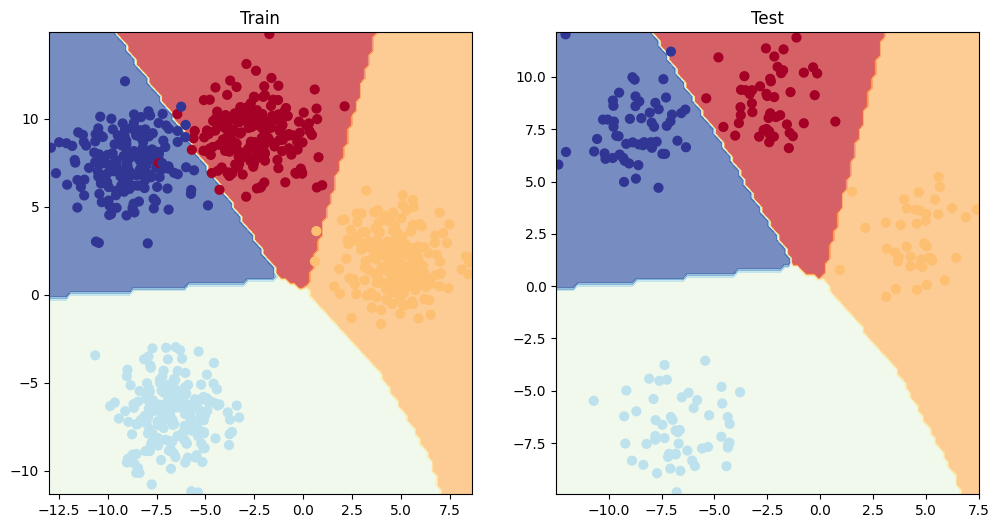

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)